In [29]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [32]:
## Change the directory
os.chdir('C:/Users/ANKUR/Data_science_project')

<IPython.core.display.Javascript object>

In [34]:
# Read the file
datafile = pd.read_csv('california_housing_train.csv')
datafile.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900,NaN,NaN,NaN
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100,NaN,NaN,NaN
2,-114.56,33.69,17,720,174,333,117,1.6509,85700,NaN,NaN,NaN
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400,NaN,NaN,NaN
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500,NaN,NaN,NaN


In [27]:
datafile.shape

(16999, 12)

In [28]:
X = datafile.iloc[:,:-1]
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Unnamed: 9,Unnamed: 10
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900,NaN,NaN
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100,NaN,NaN
2,-114.56,33.69,17,720,174,333,117,1.6509,85700,NaN,NaN
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400,NaN,NaN
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500,NaN,NaN


In [24]:
Y = datafile.iloc[:,4]
Y

0        1283
1        1901
2         174
3         337
4         326
         ... 
16994     419
16995     394
16996     528
16997     531
16998     300
Name: total_bedrooms, Length: 16999, dtype: int64

## Missing Value Detection and Imputation

In [39]:
data = pd.read_csv('Sample_real_estate_data.csv')
data.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,100.0
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800.0


In [38]:
data.shape

(9, 7)

In [36]:
print(data['ST_NUM'].isnull())

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool


In [37]:
print(data['NUM_BEDROOMS'].isnull())

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool


In [40]:
missing_value = ["na","n/a","--"]
data1 = pd.read_csv('Sample_real_estate_data.csv',na_values = missing_value)

In [41]:
data1.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,100.0
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0


In [44]:
print(data1["ST_NUM"].isnull())

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool


In [45]:
print(data['OWN_OCCUPIED'].isnull())

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool


In [46]:
count = 0
for row in data['OWN_OCCUPIED']:
    try:
        int(row)
        data.loc[count,'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    count +=1

In [47]:
print(data['OWN_OCCUPIED'].isnull())

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool


In [48]:
print(data.isnull().sum())

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64


In [51]:
from sklearn.impute import SimpleImputer


In [64]:
#from sklearn.preprocessing import Imputer
X = data.iloc[:,:-1].values
Y = data.iloc[:,6]
X

array([[100001000.0, 104.0, 'PUTNAM', 'Y', '3', '1'],
       [100002000.0, 197.0, 'LEXINGTON', 'N', '3', '1.5'],
       [100003000.0, nan, 'LEXINGTON', 'N', nan, '1'],
       [100004000.0, 201.0, 'BERKELEY', nan, '1', nan],
       [nan, 203.0, 'BERKELEY', 'Y', '3', '2'],
       [100006000.0, 207.0, 'BERKELEY', 'Y', nan, '1'],
       [100007000.0, nan, 'WASHINGTON', nan, '2', 'HURLEY'],
       [100008000.0, 213.0, 'TREMONT', 'Y', '1', '1'],
       [100009000.0, 215.0, 'TREMONT', 'Y', 'na', '2']], dtype=object)

In [77]:
imput = SimpleImputer(missing_values =np.nan,strategy = 'mean')
imput = imput.fit(X[:,1:2])
X[:,1:2] = imput.transform(X[:,1:2])

In [78]:
X[:,1:2]

array([[104.0],
       [197.0],
       [191.42857142857142],
       [201.0],
       [203.0],
       [207.0],
       [191.42857142857142],
       [213.0],
       [215.0]], dtype=object)

In [79]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,100.0
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800.0


In [93]:
# median = data['NUM_BEDROOMS'].median()
# data['NUM_BEDROOMS'].fillna(median, inplace=True)
# data

## Categorical Value Encoding

In [94]:
df = pd.read_csv('MallCustomers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [95]:
df.shape

(200, 5)

In [116]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,4].values

### Label Encoding

In [126]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
X[:,1] = lbl.fit_transform(X[:,1])
X[:,1]

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1], dtype=object)

### One Hot Encoding

In [129]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([("Country", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [130]:
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:,:-1].values 
y = dataset.iloc[:,8].values
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,6,148,72,35,0,33.6,0.627,50,1,NaN,NaN,NaN,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN,NaN,NaN,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN,NaN,NaN,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN,NaN,NaN,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN,NaN,NaN,NaN


In [135]:
dataset.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Unnamed: 9                  768
Unnamed: 10                 766
Unnamed: 11                 768
Unnamed: 12                 766
dtype: int64

In [136]:
#np.set_printoptions(edgeitems=127)

## Train Test Split

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
stdscalar = StandardScaler()
#X_train = stdscalar.fit_transform(X_train)
#X_test = stdscalar.transform(X_test)

In [53]:
# Load the data
from sklearn.datasets import load_boston
boston = load_boston()
# Find the features and targets
X = boston.data
Y = boston.target

C:\Users\ANKUR\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [54]:
# Find the dic keys
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [55]:
print(boston.data.shape)
print(boston.feature_names)
# Find the feature names
columns = boston.feature_names

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [56]:
# Description of dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [58]:
# Create Dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

<IPython.core.display.Javascript object>

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [62]:
boston_df_o = boston_df
boston_df.shape

(506, 13)

## Ways to detect outliers

### Box plot

<AxesSubplot:xlabel='DIS'>

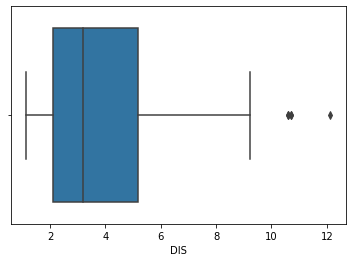

In [60]:
# Outlier detection - Univariate - Boxplot
get_ipython().magic('matplotlib inline')
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=boston_df['DIS'])

<AxesSubplot:>

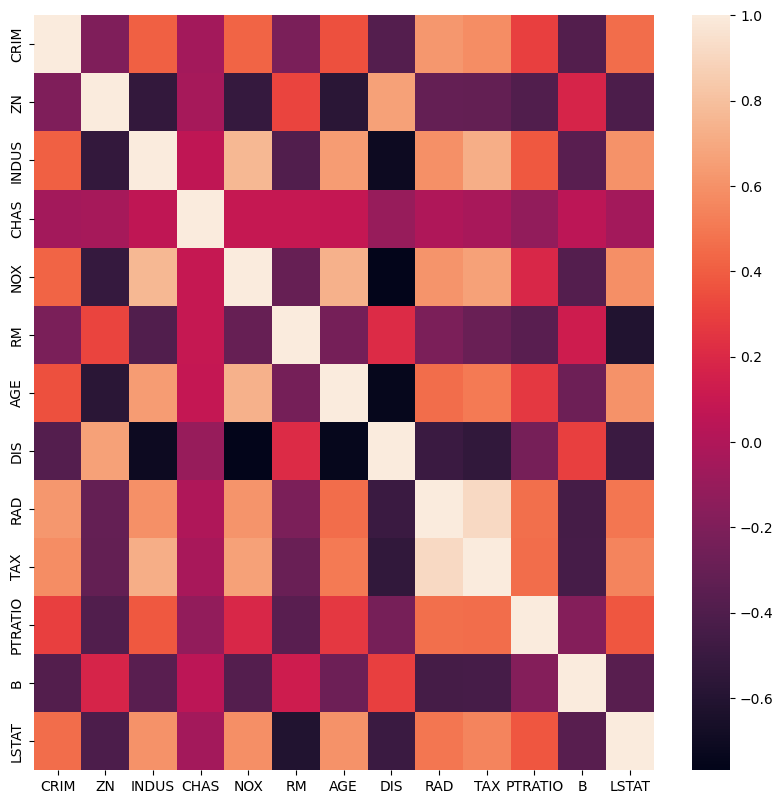

In [61]:
#Check the correlation between features before multivariate outlier analysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize= (10,10), dpi=100)
sns.heatmap(boston_df.corr())

### Scatter Plot

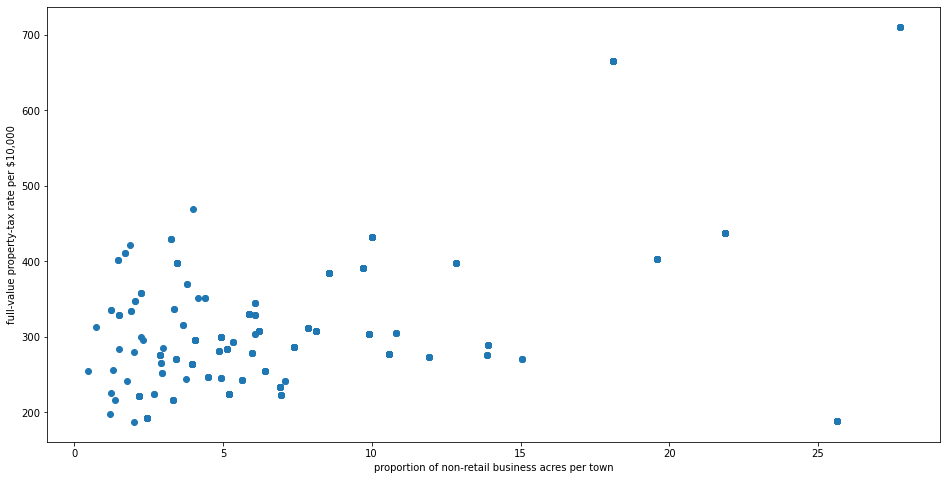

In [68]:
# Multivariate outlier analysis
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('proportion of non-retail business acres per town')
ax.set_ylabel('full-value property-tax rate per $10,000')
plt.show()

### Z-score

In [69]:
from scipy import stats
z = np.abs(stats.zscore(boston_df))
print(z)

<IPython.core.display.Javascript object>

         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0    0.419782  0.284830  1.287909  0.272599  0.144217  0.413672  0.120013   
1    0.417339  0.487722  0.593381  0.272599  0.740262  0.194274  0.367166   
2    0.417342  0.487722  0.593381  0.272599  0.740262  1.282714  0.265812   
3    0.416750  0.487722  1.306878  0.272599  0.835284  1.016303  0.809889   
4    0.412482  0.487722  1.306878  0.272599  0.835284  1.228577  0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501  0.413229  0.487722  0.115738  0.272599  0.158124  0.439316  0.018673   
502  0.415249  0.487722  0.115738  0.272599  0.158124  0.234548  0.288933   
503  0.413447  0.487722  0.115738  0.272599  0.158124  0.984960  0.797449   
504  0.407764  0.487722  0.115738  0.272599  0.158124  0.725672  0.736996   
505  0.415000  0.487722  0.115738  0.272599  0.158124  0.362767  0.434732   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
0    0.14

In [70]:
threshold = 3
print(np.where(z > 3))

<IPython.core.display.Javascript object>

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

### IQR Score

In [31]:
boston_iqr = boston
Q1 = boston_iqr.quantile(0.25)
Q3 = boston_iqr.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [32]:
print(boston_iqr < (Q1 - 1.5 * IQR)) | (boston_iqr > (Q3 + 1.5 * IQR))

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  
0      False  False  False  
1      False  Fal

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

## Ways to remove or correct the outliers 

### Z_Score

In [152]:
boston_clean = boston
boston_clean = boston_clean[(zscore < 3).all(axis=1)]

In [153]:
boston.shape

(506, 13)

In [154]:
boston_clean.shape

(415, 13)

### IQR Score

In [36]:
boston_iqr_clean = boston_iqr[~((boston_iqr < (Q1 - 1.5 * IQR)) | (boston_iqr > (Q3 + 1.5 * IQR))).any(axis=1)]
print(boston_iqr_clean.shape)

(274, 13)
